In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
sns.set_style('whitegrid')
%matplotlib inline
print("complete")

complete


In [3]:
from sklearn.datasets import load_boston

In [4]:
boston = load_boston()

In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Text(0, 0.5, 'Number of houses')

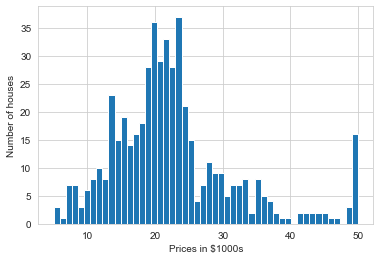

In [6]:
plt.hist(boston.target,bins=50)
plt.xlabel('Prices in $1000s')
plt.ylabel('Number of houses')

Text(0.5, 0, 'Number of rooms')

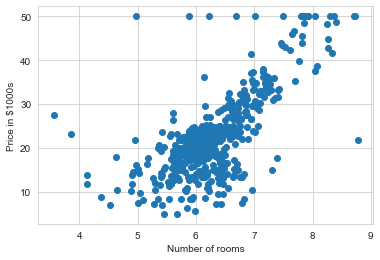

In [7]:
plt.scatter(boston.data[:,5],boston.target)
plt.ylabel('Price in $1000s')
plt.xlabel('Number of rooms')

In [8]:
boston_df = DataFrame(boston.data)
boston_df.columns = boston.feature_names
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
X = boston.data
y = boston.target

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Random Forest

In [16]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=100, random_state=42)
forest.fit(X_train_scaled, y_train)
from sklearn.metrics import mean_squared_error

y_pred = forest.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
accuracy = model.score(X_test_scaled, y_test)
print("Feature ranking:")
for f in range(X_train_scaled.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
print("Accuracy: ", accuracy)

Mean squared error: 9.621857342105262
Feature ranking:
1. feature 5 (0.439585)
2. feature 12 (0.379941)
3. feature 7 (0.066120)
4. feature 0 (0.031731)
5. feature 10 (0.019494)
6. feature 11 (0.012656)
7. feature 4 (0.012637)
8. feature 6 (0.012022)
9. feature 9 (0.011789)
10. feature 2 (0.006785)
11. feature 8 (0.004050)
12. feature 3 (0.001600)
13. feature 1 (0.001591)
Accuracy:  0.8708702508092472


In [18]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

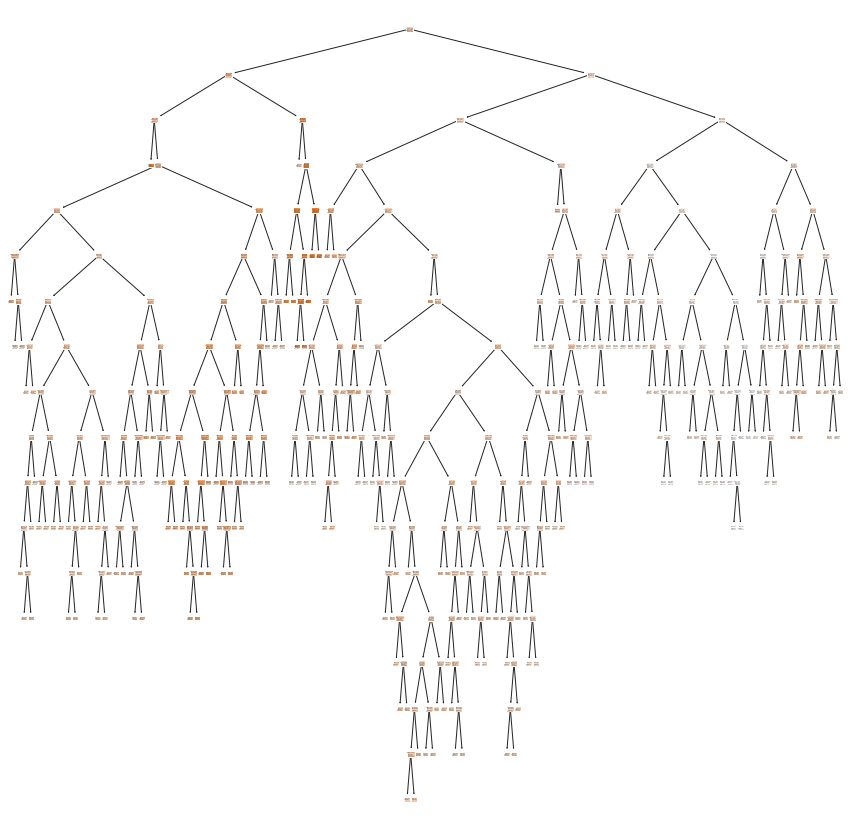

In [20]:
plt.figure(figsize=(15, 15))
plot_tree(forest.estimators_[0], feature_names=boston.feature_names, filled=True)
plt.show()

### Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, precision_score

In [25]:
# Create a linear regression model
lr = LinearRegression()

# Train the model on the training data
lr.fit(X_train_scaled, y_train)

# Use the trained model to make predictions on the testing data
y_pred = lr.predict(X_test)

# Calculate the R-squared score of the model
r2 = r2_score(y_test, y_pred)

# Print the R-squared score of the model
print("R-squared:", r2)
# Calculate the precision of the model
precision = precision_score(y_test, y_pred, average='weighted')

# Print the precision of the model
print("Precision:", precision)

R-squared: -2743.353266677476


ValueError: continuous is not supported